# Part I: Introduction to Qiskit
Welcome to Qiskit! Before starting with the exercises, please run the cell below by pressing 'shift' + 'return'.

In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit.primitives import StatevectorSampler, PrimitiveJob
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator, QasmSimulator
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_qsphere
from utilities import dj_problem_oracle

## 1: Basic Rotations on One Qubit and Measurements on the Bloch Sphere

Before getting into complicated circuits on many qubits, let us start by looking at a single qubit. Read this chapter: https://qiskit.org/textbook/ch-states/introduction.html to learn the basics about the Bloch sphere, Pauli operators, as well as the Hadamard gate and the $S$ and $S^\dagger$ gates. 

By default, states in qiskit start in $|0\rangle$, which corresponds to "arrow up" on the Bloch sphere. Play around with the gates $X$, $Y$, $Z$, $H$, $S$ and $S^\dagger$ to get a feeling for the different rotations. To do so, insert combinations of the following code lines in the lines indicated in the program:

    qc.x(0)    # rotation by Pi around the x-axis
    qc.y(0)    # rotation by Pi around the y-axis
    qc.z(0)    # rotation by Pi around the z-axis
    qc.s(0)    # rotation by Pi/2 around the z-axis
    qc.sdg(0)  # rotation by -Pi/2 around the z-axis
    qc.h(0)    # rotation by Pi around an axis located halfway between x and z

Try to reach the given state in the Bloch sphere in each of the following exercises. (Press Shift + Enter to run a code cell)
### 1.) Let us start easy by performing a bit flip. The goal is to reach the state $|1\rangle$. 

<div><img src="figures/state1.png" width="200"></div>

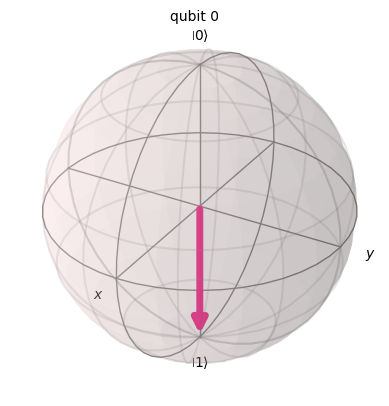

In [2]:
def ex1():
    qc = QuantumCircuit(1)
    # Rotation around x-axis to get to the state |1> with no phase-shift
    qc.x(0)
    return qc

state = Statevector.from_instruction(ex1())
plot_bloch_multivector(state)

### 2.) Next, we would like to create superposition. The goal is to reach the state $|+\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)$. 

<div><img src="figures/plusstate.png" width="200"></div>

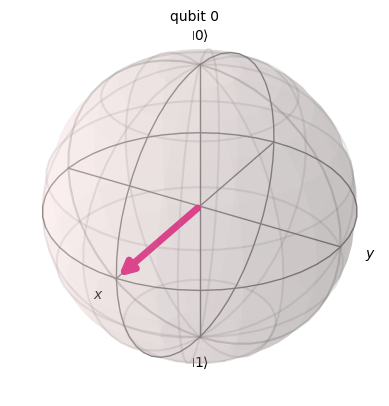

In [3]:
def ex2():
    qc = QuantumCircuit(1)
    # Using a Hadamard gate we go to state |+>
    qc.h(0)
    return qc

state = Statevector.from_instruction(ex2())
plot_bloch_multivector(state)

### 3.) Let's combine those two. The goal is to reach the state $|-\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right)$. 

<div><img src="figures/minusstate.png" width="200"></div>

Can you even come up with different ways?

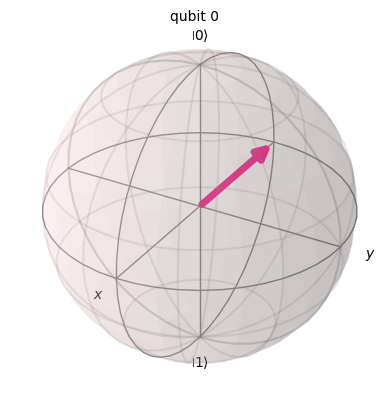

In [4]:
def ex3():
    qc = QuantumCircuit(1)
    # Apply Hadamard to get the superpostiion
    qc.h(0)
    # Phase Flip to take from |+> to |->
    qc.z(0)
    return qc

state = Statevector.from_instruction(ex3())
plot_bloch_multivector(state)

### 4.) Finally, we move on to the complex numbers. The goal is to reach the state $|- i\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - i|1\rangle\right)$. 

<div><img src=figures/leftstate.png width="200"></div>

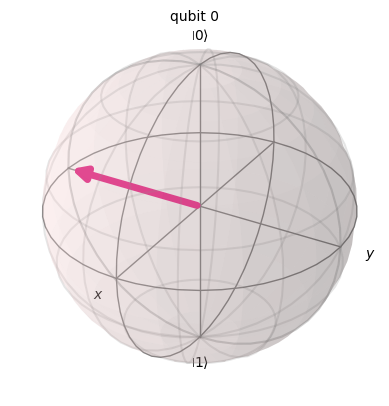

In [5]:
def ex4():
    qc = QuantumCircuit(1)
    # Apply Hadamard to get the superpostiion
    qc.h(0)
    # Rotate around z-axis by -pi/2 to take it to the state |-i>
    qc.sdg(0)
    return qc

state = Statevector.from_instruction(ex4())
plot_bloch_multivector(state)

## 2: Quantum Circuits Using Multi-Qubit Gates
Great job! Now that you've understood the single-qubit gates, let us look at gates on multiple qubits. Check out this chapter if you would like to refresh the theory: https://qiskit.org/textbook/ch-gates/introduction.html. The basic gates on two and three qubits are given by

    qc.cx(c,t)       # controlled-X (= CNOT) gate with control qubit c and target qubit t
    qc.cz(c,t)       # controlled-Z gate with control qubit c and target qubit t
    qc.ccx(c1,c2,t)  # controlled-controlled-X (= Toffoli) gate with control qubits c1 and c2 and target qubit t
    qc.swap(a,b)     # SWAP gate that swaps the states of qubit a and qubit b

We start with an easy gate on two qubits, the controlled-NOT (also CNOT) gate . As it has no effect applied on two qubits in state $|0\rangle$, we apply a Hadamard gate before to bring the control qubit in superposition. This way, we can create entanglement. The resulting state is one of the so-called Bell states. 
### 5.) Construct the Bell state $|\Psi^+\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle + |10\rangle\right)$.

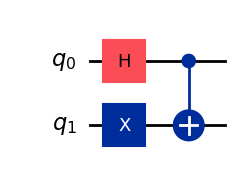

In [6]:
def ex5():
    # Create a Quantum Circuit with 2 Qubits
    qc = QuantumCircuit(2)
    # The initial state has to be |01>
    qc.x(1)

    # Apply Hadamard to the first qubit and C-NOT to the second one
    qc.h(0)
    qc.cx(0,1)
    return qc

qc = ex5()
qc.draw('mpl') # we draw the circuit

Let us now also add a measurement to the above circuit so that we can execute it (using the simulator) and plot the histogram of the corresponding counts.

{'01': 520, '10': 504}


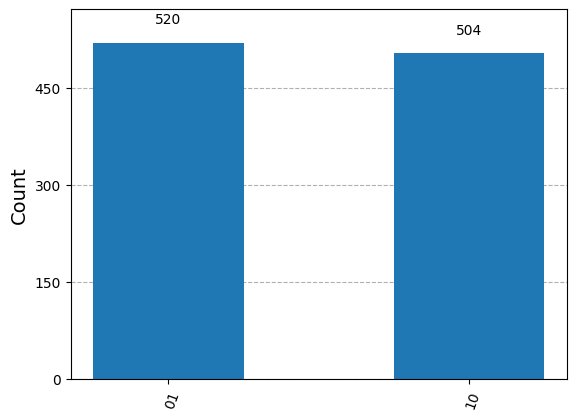

In [7]:
qc.measure_all() # we measure all the qubits

sampler = StatevectorSampler()
pub = qc
job_sampler = sampler.run([pub], shots=1024)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)
plot_histogram(counts_sampler)


As you can see in the histogram, the only possible outputs are "01" and "10", so the states of the two qubits are always perfectly anti-correlated.

### 6.) Write a function that builds a quantum circuit on 3 qubits and creates the GHZ-like state, $|\Psi\rangle = \frac{1}{\sqrt{2}} \left(|010\rangle - |101 \rangle \right)$.
Hint: the following circuit constructs the GHZ state, $|GHZ\rangle = \frac{1}{\sqrt{2}} \left(|000\rangle + |111 \rangle \right)$:

<div><img src="figures/ghz_state.png" width="200"></div>

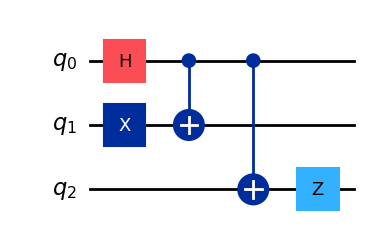

In [8]:
def ex6():
    # Quantum Circuit on 3 quibits
    qc = QuantumCircuit(3)

    # |010> and |101> imply second qubit is different from first and third (we must flip it first)
    qc.x(1)
    
    # Apply Hadamard to the first qubit for superposition
    qc.h(0)
    # Apply C-NOT to the second and third qubits (second is different from first and third)
    qc.cx(0,1)
    qc.cx(0,2)
    # Apply Phase shift (we need a subtraction of the second term -> Z on first or third Qubit, which are |1> there)
    qc.z(2)
    
    return qc

qc = ex6()
qc.draw('mpl') # we draw the circuit

Congratulations for finishing these introductory exercises! Hopefully, they got you more familiar with the Bloch sphere and basic quantum gates. Let us now apply this knowledge to the second part, where we construct our first quantum algorithm, the Deutsch-Jozsa algorithm.

# Part II: Coin toss quantum circuit
In this exercise we create a quantum circuit that simulates the probabilistic nature of a single qubit in superposition. The one qubit circuit initializes the qubit in the ground state $|0\rangle$ and then uses a Hadamard gate to put the qubit in superposition $|\psi\rangle = \left(|0\rangle+|1\rangle\right)/\sqrt{2}.$  
Measuring the qubit causes it to collapse into one of the states $|0\rangle$ or $|1\rangle$ with a 50% probability, i.e. a coin toss.   
In this exercise we introduce the Hadamard gate, which puts a qubit in superposition.  

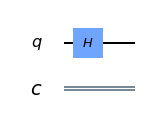


In [9]:
# Add the state vector calculation function
def get_psi(circuit, vis): 
    global psi
    psi = Statevector(circuit)
    if vis=="Q":
        display(plot_state_qsphere(psi))
    elif vis=="M":
        print(psi)
    elif vis=="B":
        display(plot_bloch_multivector(psi))
        
    vis=""

Create an empty quantum circuit. We start out with the qubit in the $|0\rangle$ state.

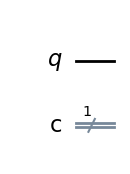

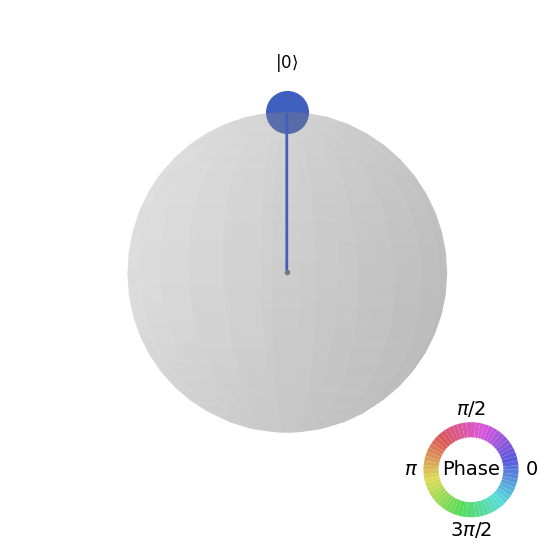

In [10]:
qc = QuantumCircuit(1,1)

# Print out the circuit
display(qc.draw(output="mpl"))

# Display the Bloch sphere
get_psi(qc,"Q")


Add a Hadamard (super position) gate to the quantum circuit. This puts the qubit in a superposition: $|\psi\rangle = \left(|0\rangle+|1\rangle\right)/\sqrt{2}.$

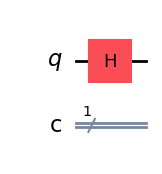

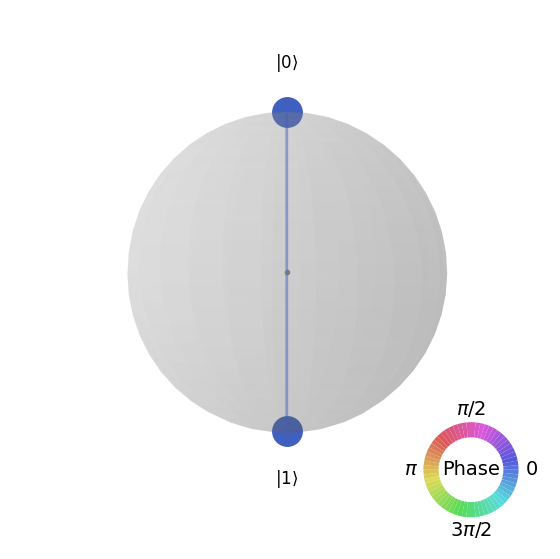

In [11]:
qc.h(0)

# Print out the circuit
display(qc.draw(output="mpl"))

# Display the Bloch sphere
get_psi(qc,"Q")


Finally, add a measurement gate to complete the circuit.

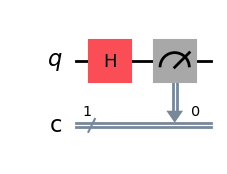

In [12]:
# Add measure gate
qc.measure(0,0)
display(qc.draw(output="mpl"))


Set the backend to a local simulator.

In [13]:
backend = QasmSimulator()

Create a quantum job that runs just one shot to simulate a coin toss. Then run the job and display the result; either 0 for up (base) or 1 for down (excited). Display the result as a histogram.

{'0': 1}


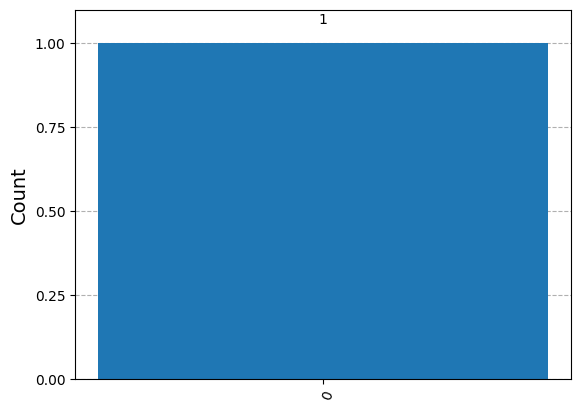

In [14]:
job = backend.run(qc,shots = 1)
counts  = job.result().get_counts()
print(counts)
plot_histogram(counts)

# Adding some statistics
**Now, it is your turn!** Just running the circuit once gives you a single quantum outcome, 0 or 1. But generally that single result might not be useful, and you want to see some statistics of the potential outcome space. Lets run a thousand coin tosses in a row, print the outcome and display it in a histogram. With what probability do you expect to get 0 and 1? Do the results match your expectation? 

**Tip:** You can modify the previous commands, or create a new execution by adding code in the next window.

{'0': 505, '1': 495}


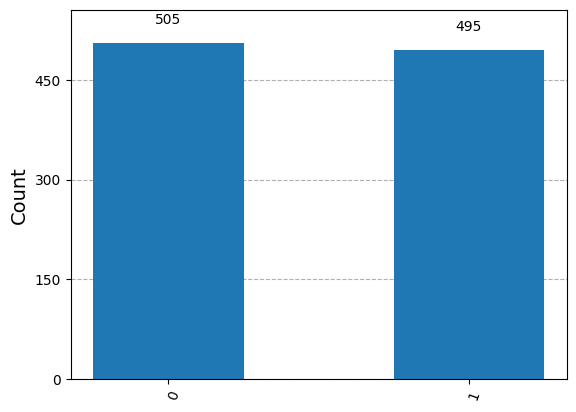

In [15]:
# Histograma contar 0 y 1 con 1000 intentos de lanzamiento
job = backend.run(qc,shots = 1000)
counts  = job.result().get_counts()
print(counts)
plot_histogram(counts)

# Se esperaría obtener cerca del 50% en ambos resultados

# Cheating coin toss quantum circuit
Can we tweak the probabilistic nature of a single qubit in superposition? Can we cheat in coin tossing?

Like before we put the qubit in superposition $|\psi\rangle = \left(|0\rangle+|1\rangle\right)/\sqrt{2}.$  
We then add an additional Ry (rotation around the Y axis) gate, which pushes the Bloch vector $\pi/8$ closer to $|1\rangle$. we tweak the odds in favor of $|1\rangle$. The expected outcome is now $|0\rangle$ ~ 33% and $|1\rangle$ with a 66% probability.

In this exercise we introduce the Ry gate, which rotates a qubit around the y-axis.
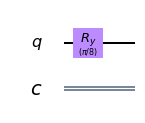


Add a Hadamard (super position) gate to the quantum circuit. This puts the qubit in a superposition: $|\psi\rangle = \left(|0\rangle+|1\rangle\right)/\sqrt{2}.$

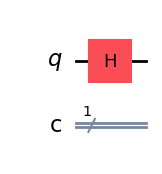

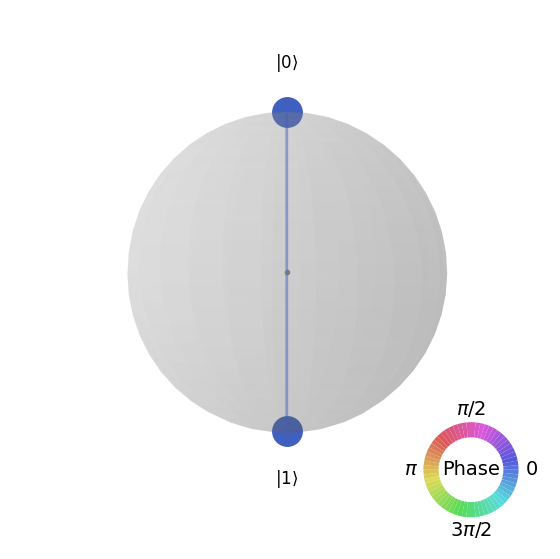

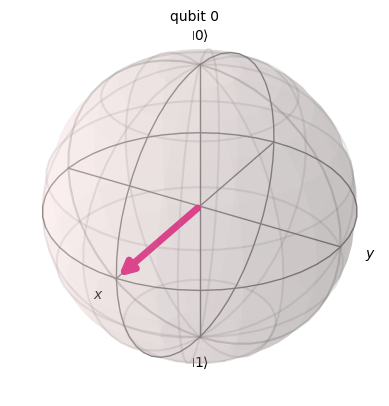

In [16]:
qc3 = QuantumCircuit(1,1)
qc3.h(0)

display(qc3.draw(output="mpl"))

# Display the Bloch sphere
get_psi(qc3,"Q")
get_psi(qc3,"B")


Now, let's rotate the Bloch vector vector $\pi$/8 radians closer to $|1\rangle$ by adding a Y rotation gate.

For the rotation gate we need to use $\pi$, which we import from Python math.

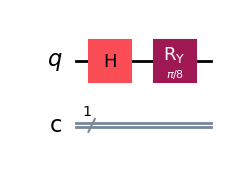

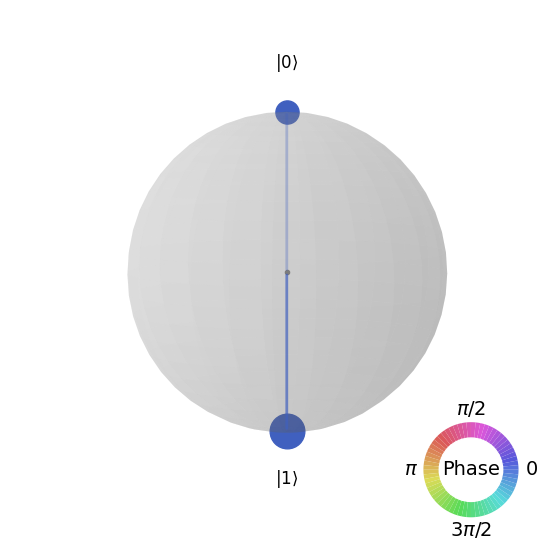

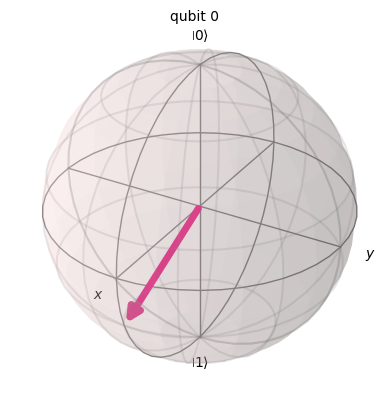

In [17]:
from math import pi

qc3.ry(pi/8,0) 
#Move the Bloch vector pi/8 radians closer to |1>. 
display(qc3.draw(output="mpl"))

# Display the Bloch sphere
get_psi(qc3,"Q")
get_psi(qc3,"B")

Add measurement and then run the circuit on a local simulator like before.


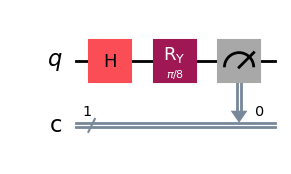

{'0': 318, '1': 706}


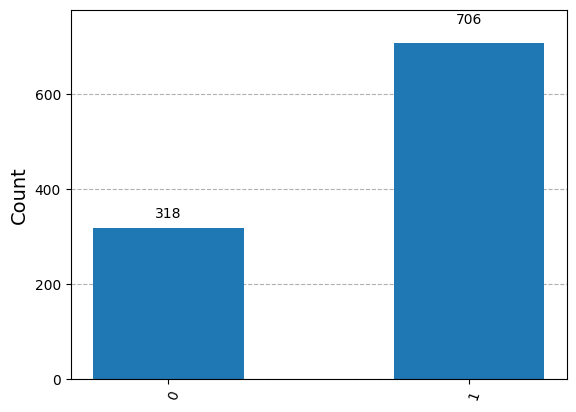

In [18]:
qc3.measure(0,0)
display(qc3.draw(output="mpl"))

backend = QasmSimulator()

job3 = backend.run(qc3, shots=1024)
result3 = job3.result()
counts3  = result3.get_counts(qc3)
print(counts3)
plot_histogram(counts3)

Notice the change inprobability for getting 0 and 1. The slight tweak of the Bloch vector towards |1> turns out to have a massive result in that ~70% of the coin tosses are now |1>.

##### Retweak your quantum coin to your advantage
**Your turn again!** Now go ahead and change the probability for your coin toss to be ~75% chance to get the result 0.

**Tip:** You can modify the previous commands, or create and execute a new circuit, adding the gates, and then running the circuit and displaying the results by adding code in the next window. 

**Challenge:** Can you get the same results *without* using the Hadamard gate?

In [19]:
# Calcular la probabilidad de |0> a partir del ángulo y la amplitud

import math as m
theta = -m.pi/6
alpha = 1/2*(m.cos(theta/2) - m.sin(theta/2))**2
print(alpha)

0.7499999999999999


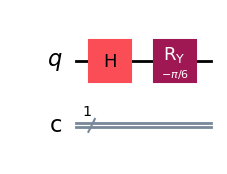

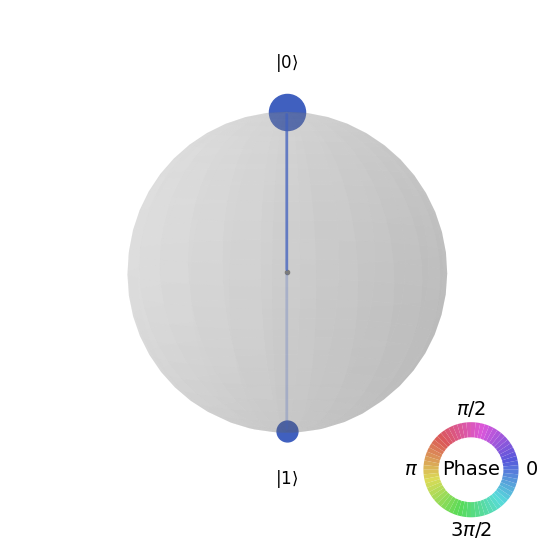

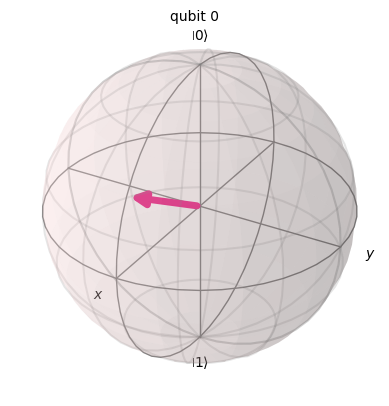

In [20]:
qc4 = QuantumCircuit(1,1)

# Create the superposition state with Hadamard
qc4.h(0)
# Apply the rotation to get probability 0.75 for |0> and 0.25 for |1>
# We find the angle in the Ry matrix 1/sqrt(2)*[[cos(theta/2), -sin(theta/2)], [sin(theta/2), cos(theta/2)]]
# Amplitudes squared must be |alpha|^2 = 1/2*(cos(theta/2) - sin(theta/2))^2 = 0.75 and |beta|^2 = 1/2*(cos(theta/2) + sin(theta/2))^2 = 0.25
# Solution from solving the alpha equation is theta = -pi/6
theta = -m.pi/6

qc4.ry(theta,0)

# Draw the circuit
display(qc4.draw(output="mpl"))

# Display the Bloch sphere
get_psi(qc4,"Q")
get_psi(qc4,"B")

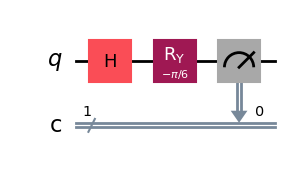

In [21]:
# Add the measurement
qc4.measure(0,0)

# Draw the circuit
display(qc4.draw(output="mpl"))

{'0': 749, '1': 251}


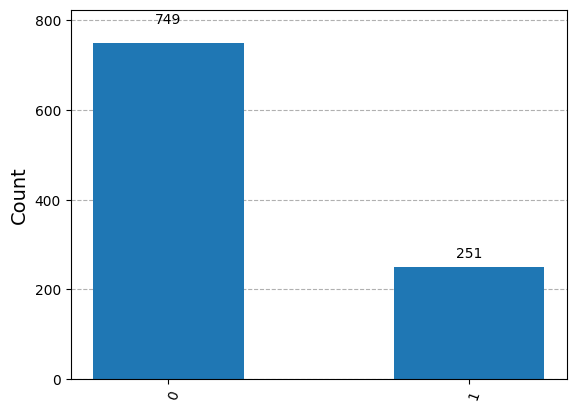

In [22]:
backend = QasmSimulator()

# Histograma contar 0 y 1 con 1000 intentos de lanzamiento
job4 = backend.run(qc4, shots = 1000)
counts4  = job4.result().get_counts(qc4)
print(counts4)
plot_histogram(counts4)

## Challenge: No Hadamard

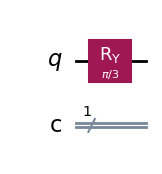

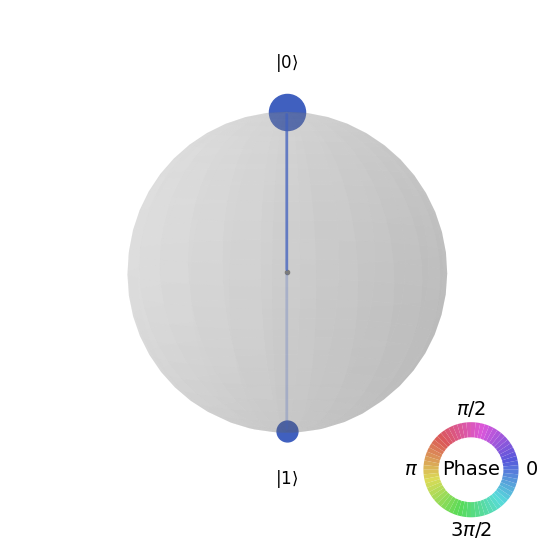

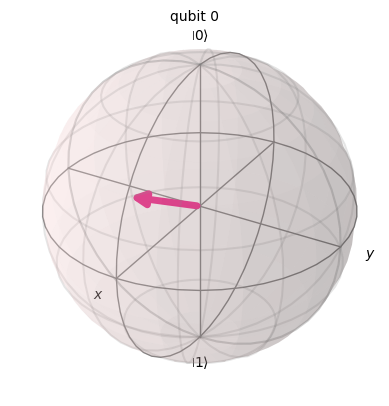

In [23]:
qc5 = QuantumCircuit(1,1)

# Apply the rotation to get probability 0.75 for |0> and 0.25 for |1> WITHOUT HADAMARD
# Since Hadamard equivalently rotates by pi/2 around y-axis and then -pi/6, the overall effect is like pi/2-pi/6 = pi/3
theta = pi/3

qc5.ry(theta,0)

# Draw the circuit
display(qc5.draw(output="mpl"))

# Display the Bloch sphere
get_psi(qc5,"Q")
get_psi(qc5,"B")

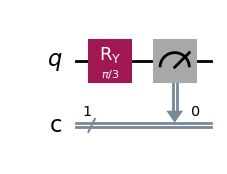

{'0': 747, '1': 253}


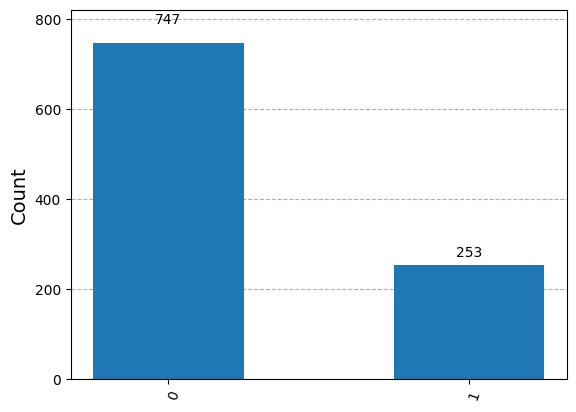

In [24]:
# Add the measurement
qc5.measure(0,0)

# Draw the circuit
display(qc5.draw(output="mpl"))

backend = QasmSimulator()

# Histograma contar 0 y 1 con 1000 intentos de lanzamiento
job5 = backend.run(qc5, shots = 1000)
counts5  = job5.result().get_counts(qc5)
print(counts5)
plot_histogram(counts5)

Congratulations, you now know how to cheat in coin tossing. Next stop Las Vegas! As you have seen, you are not *required* to use the Hadamard gate to put your qubit in a superposition, any rotational gate along the X or Y axis will do. The Hadamard gate is just a very handy gate to initialize your qubit for further computing.

# Tossing your coin on an IBM quantum computer
In this exercise we run our simple coin toss circuit on a real IBM Q quantum computer. For a local Qiskit installation we need to store our IBM Q credentials locally to be able to access the IBM Q backends.
We use the `least_busy` method to find the backend with the smallest queue.

In [1]:
# Import IBMQ and the job monitoring tool
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator

**Time for some work!** Before you can run your program on IBM Q you must load your API key. 

In [2]:
# If you did not previously save your credentials, use the following line instead:
# QiskitRuntimeService.save_account(channel='ibm_quantum', token = 'YOURTOKENHERE')
service = QiskitRuntimeService()

Set the backend to the least busy IBM quantum computer. We filter out simulators. We also want to know how long the quque is.

In [3]:
backend = service.least_busy(simulator=False, operational=True)
print(backend.configuration().backend_name)
print(backend.status().pending_jobs)

ibm_sherbrooke
188


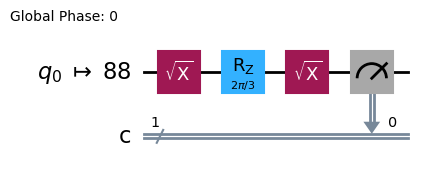

In [28]:
# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_circuit = pm.run(qc4)
 
isa_circuit.draw('mpl', idle_wires=False)

In [29]:
# Construct the Sampler instance.
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(backend)
 
job = sampler.run([isa_circuit])
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: ctae3vfykbsg008z609g
>>> Job Status: QUEUED


In [30]:
print(f">>> Job Status: {job.status()}")

>>> Job Status: QUEUED


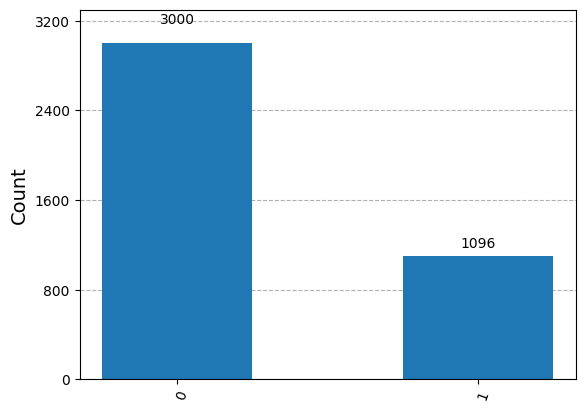

In [31]:
result = job.result()
plot_histogram(result[0].data.c.get_counts())

And a final congratulation for this exercise. You have just run your first quantum program on a bona-fide IBM quantum computer.

# Part III: Oracles and the Deutsch-Jozsa algorithm

Many quantum algoritms revolve around the notion of so called $\textit{oracles}$. An oracle is a function that can be considered as a 'black box'. We generally want to find out specific properties of this function. We do this by asking questions to the oracle (*querying*). The query complexity is then defined as the minimum number of queries in order to find these properties.


To get familiar with the use of oracles we will now consider the Deutsch-Josza problem. We will see that the quantum solution has a drastically lower query complexity than its classical counterpart.


## Deutsch-Jozsa Problem <a id='djproblem'> </a>

We are given a hidden Boolean function $f$, which takes as input a string of bits, and returns either $0$ or $1$, that is:

$$
f(\{x_0,x_1,x_2,...\}) \rightarrow 0 \textrm{ or } 1 \textrm{ , where } x_n \textrm{ is } 0 \textrm{ or } 1$$

The property of the given Boolean function is that it is guaranteed to either be balanced or constant. A constant function returns all $0$'s or all $1$'s for any input, while a balanced function returns $0$'s for exactly half of all inputs and $1$'s for the other half. Our task is to determine whether the given function is balanced or constant.

The Deutsch-Jozsa algorithm was the first example of a quantum algorithm that performs better than the best classical algorithm. It showed that there can be advantages to using a quantum computer as a computational tool for a specific problem.


In the Deutsch-Josza problem you are given an unknown orcale. This is in Qiskit implemented by the function:

In [32]:
oraclenr = 4 # determines the oracle (can range from 1 to 5)
oracle = dj_problem_oracle(oraclenr) # gives one out of 5 oracles
oracle.name = "DJ-Oracle"

This function gives a certain oracle with 5 input qubits. The last qubit ($q_4$) will be the output. In order to get a feeling for the oracle, let us create a circuit to which we add the oracle such that we can pass it different input strings and then measure the output of $q_4$. This corresponds to the classical way of determining whether the oracle is balanced or constant.

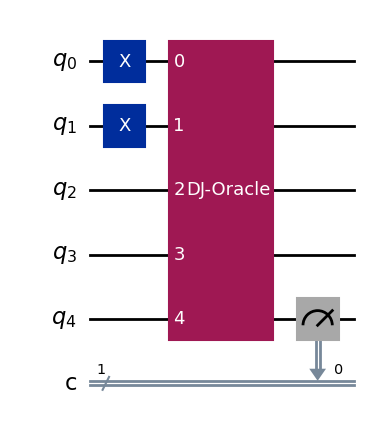

In [33]:
def dj_classical(n, input_str):
    
    # build a quantum circuit with n qubits and 1 classical readout bit
    dj_circuit = QuantumCircuit(n+1,1)
    
    # Prepare the initial state corresponding to your input bit string
    for i in range(n):
        if input_str[i] == '1':
            dj_circuit.x(i)
    
    # append oracle
    dj_circuit.append(oracle, range(n+1))
    
    # measure the fourth qubit 
    dj_circuit.measure(n,0)
    # dj_circuit.measure_all()
    
    return dj_circuit
    
n = 4 # number of qubits
input_str = '1100'
dj_circuit = dj_classical(n, input_str)
dj_circuit.draw(output='mpl') # draw the circuit

Now we simulate the results to find the outcome of this circuit. Try different input bit strings to see the corresponding outputs!

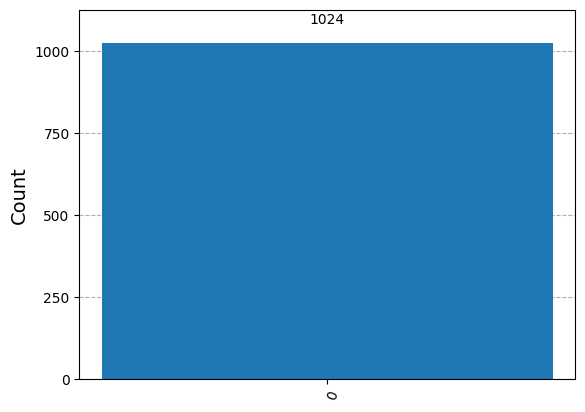

In [34]:
sampler = StatevectorSampler()
job_sampler = sampler.run([dj_circuit], shots=1024)
results = job_sampler.result()[0].data.c.get_counts()
plot_histogram(results)

Do you already have an idea whether the oracle is balanced or constant? What is the minimum and maximum number of inputs you would need to check to know whether this 4 bit classical Deutsch-Josza oracle is balanced or constant?

In [35]:
min_nr_inputs = 2 # put your answer here
max_nr_inputs = 9 # put your answer here

## Quantum Solution to the Deutsch-Josza Problem

Using a quantum computer, we can find out if the oracle is constant or balanced with 100% confidence after only one call to the function $f(x)$, provided we have the function $f$ implemented as a quantum oracle, which maps the state $\vert x\rangle \vert y\rangle $ to $ \vert x\rangle \vert y \oplus f(x)\rangle$, where $\oplus$ is addition modulo $2$. Below we will walk through the algorithm.

Prepare two quantum registers. The first is an $n$-qubit register initialised to $|0\rangle$, and the second is a one-qubit register initialised to $|-\rangle =\frac{1}{\sqrt{2}}\left(|0\rangle - |1 \rangle \right)$. Note, that with Qiskit states are described as $\vert b_3 b_2 b_1 b_0\rangle_{q_3q_2q_1q_0}$, i.e. just like for binary numbers, the last bit $b_0$ corresponds to the state of the first qubit. Thus, we want to initialize the state $$\vert \psi_0 \rangle = \vert -\rangle \otimes \vert0\rangle^{\otimes n}.$$

In [36]:
n=4
def psi_0(n):
    qc = QuantumCircuit(n+1,n)
    # Build the state (|00000> - |10000>)/sqrt(2)
    qc.h(n)
    qc.z(n)
    return qc

dj_circuit = psi_0(n)
dj_circuit.draw()

q_0: ──────────
               
q_1: ──────────
               
q_2: ──────────
               
q_3: ──────────
     ┌───┐┌───┐
q_4: ┤ H ├┤ Z ├
     └───┘└───┘
c: 4/══════════

Applying the quantum bit oracle to any state $\vert x\rangle \vert y\rangle$ would yield the state $\vert x\rangle \vert y \oplus f(x)\rangle$.
As we have prepared the state $|y\rangle$, which corresponds to the state on the last qubit $q_n$, in the state $|-\rangle$, the output of the oracle for any input bitstring $x$ is given by:
$$ \frac{1}{\sqrt{2}}\vert x\rangle (\vert f(x)\rangle - \vert 1 \oplus f(x)\rangle) = \frac{1}{\sqrt{2}} (-1)^{f(x)}|x\rangle (|0\rangle - |1\rangle ) = (-1)^{f(x)}|x\rangle |-\rangle.$$
Thus, we have created a phase oracle acting on the bit string $x$.

Before applying the oracle, we need to create our input state on the first $n$ qubits though. For that we want an equal superposition state, so that the total state on all $n+1$ qubits is given by $$\vert \psi_1 \rangle = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \vert x\rangle \left(|0\rangle - |1 \rangle \right)$$ 

In [37]:
def psi_1(n):
    
    # obtain the |psi_0> = (|00000> - |10000>)/sqrt(2) state
    qc = psi_0(n)
    
    # create the superposition state |psi_1>
    for i in range(n):
        qc.h(i)
    return qc

dj_circuit = psi_1(n)
dj_circuit.draw()

┌───┐     
q_0: ┤ H ├─────
     ├───┤     
q_1: ┤ H ├─────
     ├───┤     
q_2: ┤ H ├─────
     ├───┤     
q_3: ┤ H ├─────
     ├───┤┌───┐
q_4: ┤ H ├┤ Z ├
     └───┘└───┘
c: 4/══════════

Now we are ready to apply our oracle to the prepared superposition state $\vert \psi_1 \rangle$. This gives the state
$$ \vert \psi_2 \rangle = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \vert x\rangle (\vert f(x)\rangle - \vert 1 \oplus f(x)\rangle) = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1}(-1)^{f(x)}|x\rangle (|0\rangle - |1\rangle ) = \frac{1}{\sqrt{2^{n}}}\sum_{x=0}^{2^n-1}(-1)^{f(x)}|x\rangle |-\rangle.$$

In [38]:
def psi_2(oracle,n):
    
    # circuit to obtain psi_1
    qc = psi_1(n)
    
    # append the oracle
    qc.append(oracle, range(n+1))
    
    return qc

dj_circuit = psi_2(oracle, n)
dj_circuit.draw()

┌───┐     ┌────────────┐
q_0: ┤ H ├─────┤0           ├
     ├───┤     │            │
q_1: ┤ H ├─────┤1           ├
     ├───┤     │            │
q_2: ┤ H ├─────┤2 DJ-Oracle ├
     ├───┤     │            │
q_3: ┤ H ├─────┤3           ├
     ├───┤┌───┐│            │
q_4: ┤ H ├┤ Z ├┤4           ├
     └───┘└───┘└────────────┘
c: 4/════════════════════════

In the final part of our algorithm we disregard the outcome on our second register and we apply an n-fold Hadamard to our first register. Afterwards we measure the outcome on these qubits.

In [39]:
def ex8(oracle, n): # note that this exercise also depends on the code in the functions psi_0 (In [24]) and psi_1 (In [25])
    qc = psi_2(oracle, n)
    
    # apply n-fold hadamard gate
    for i in range(n):
        qc.h(i)
       
    # add the measurement by connecting qubits to classical bits
    for j in range(n):
        qc.measure(j,j)
    
    return qc

dj_circuit = ex8(oracle, n)
dj_circuit.draw()

┌───┐     ┌────────────┐┌───┐┌─┐         
q_0: ┤ H ├─────┤0           ├┤ H ├┤M├─────────
     ├───┤     │            │├───┤└╥┘┌─┐      
q_1: ┤ H ├─────┤1           ├┤ H ├─╫─┤M├──────
     ├───┤     │            │├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─────┤2 DJ-Oracle ├┤ H ├─╫──╫─┤M├───
     ├───┤     │            │├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─────┤3           ├┤ H ├─╫──╫──╫─┤M├
     ├───┤┌───┐│            │└───┘ ║  ║  ║ └╥┘
q_4: ┤ H ├┤ Z ├┤4           ├──────╫──╫──╫──╫─
     └───┘└───┘└────────────┘      ║  ║  ║  ║ 
c: 4/══════════════════════════════╩══╩══╩══╩═
                                   0  1  2  3

At this point the second single qubit register may be ignored. Applying a Hadamard gate to each qubit in the first register yields the state:
        $$
        \begin{aligned}
            \lvert \psi_3 \rangle 
                & = \frac{1}{2^n}\sum_{x=0}^{2^n-1}(-1)^{f(x)}
                    \left[ \sum_{y=0}^{2^n-1}(-1)^{x \cdot y} 
                    \vert y \rangle \right] \\
                & = \frac{1}{2^n}\sum_{y=0}^{2^n-1}
                    \left[ \sum_{x=0}^{2^n-1}(-1)^{f(x)+x \cdot y} \right]
                    \vert y \rangle,
        \end{aligned}
        $$
       
where $x \cdot y = x_0y_0 \oplus x_1y_1 \oplus \ldots \oplus x_{n-1}y_{n-1}$ is the sum of the bitwise product.

Let us now run the circuit including the measurement of the first register on the simulator:

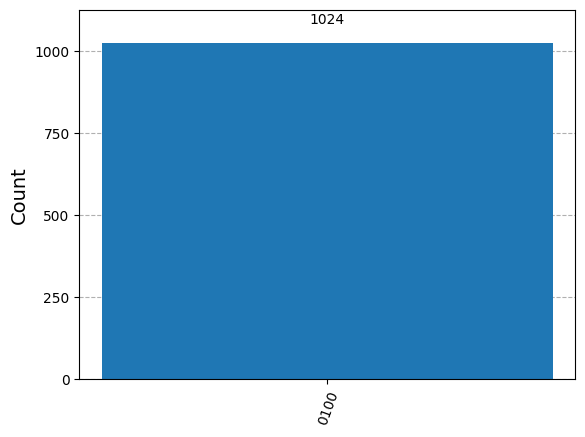

In [40]:
sampler = StatevectorSampler()
job_sampler = sampler.run([dj_circuit], shots=1024)
results = job_sampler.result()[0].data.c.get_counts()
plot_histogram(results)

As we learnt in the lecture, if the output is the zero bit string, we know that the oracle is constant. If it is any other bit string, we know that it is balanced. You may also check the other oracles by just changing the oracle number in the beginning where the oracle is defined!